### Simple Linear Regression - Predicting Housing Price

In [1]:
# Import the required librar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

%matplotlib inline

In [2]:
# Load the data file
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Text(0, 0.5, 'Count')

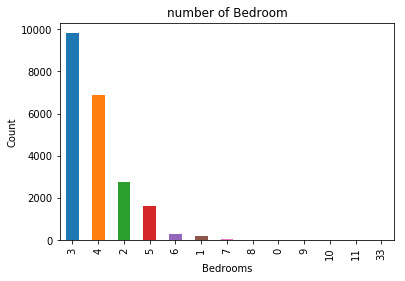

In [5]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Text(0.5, 1.0, 'Price vs Square Feet')

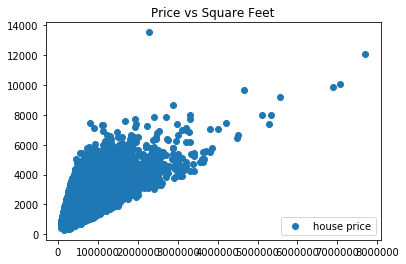

In [6]:
plt.scatter(data.price,data.sqft_living,label="house price")
plt.legend(loc='lower right')
plt.title("Price vs Square Feet")

In [7]:
print (data.shape)
num_samples = data.shape[0]
print ('num_samples: ',num_samples)

(21613, 21)
num_samples:  21613


In [8]:
# Extracting the required data
#data_x = data.sqft_living
#data_y = data.price
#data_x = data['sqft_living']
#data_y = data['price']

In [9]:
data_pr = data[['price','sqft_living']]
print ('data_shape: ',data_pr.shape)
data_pr.head()

data_shape:  (21613, 2)


,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [10]:
data_x,data_y=data_pr['price'],data_pr['sqft_living']

In [11]:
x = np.array(data_x).reshape(-1, 1)
y = np.array(data_y).reshape(-1, 1)
x_norm_val = np.max(x)
y_norm_val = np.max(y)
x_norm = x/x_norm_val
y_norm = y/y_norm_val

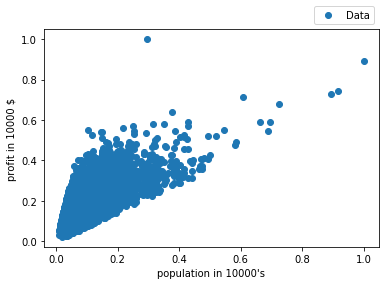

In [12]:
plt.plot(x_norm,y_norm,'o')
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.legend(['Data'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

In [13]:
type(x)
print ('shape: ',x_norm.shape)
print ('input_data: ',x_norm[0:10])


shape:  (21613, 1)
input_data:  [[0.02881818]
 [0.06987013]
 [0.02337662]
 [0.07844156]
 [0.06623377]
 [0.15909091]
 [0.03344156]
 [0.0379026 ]
 [0.02980519]
 [0.04194805]]


In [14]:
print ('type: ',type(y))
print ('shape: ',y_norm.shape)
print ('output_data: ',y_norm[0:10])

type:  <class 'numpy.ndarray'>
shape:  (21613, 1)
output_data:  [[0.08714919]
 [0.18980798]
 [0.05686854]
 [0.14475628]
 [0.12407681]
 [0.40029542]
 [0.12666174]
 [0.07828656]
 [0.13146233]
 [0.13958641]]


In [15]:
#Splitting the data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x_norm,y_norm,test_size=1/3, random_state=0)

In [16]:
print ('train_data: ',x_train.shape)
print ('test_data: ',x_test.shape)

train_data:  (14408, 1)
test_data:  (7205, 1)


In [17]:
## Representing model
w = 0
b = 0
x1=x_train[0]
y_pred = w*x1+b
y1=y_train[0]
print ('actual value: ',y1)
print('prediction: ',y_pred)
loss = np.power((y1-y_pred),2)
print('loss: ',loss)
#def prediction(w,b,x):
 #   y_pred = np.sum(b,np.multiply(w,x))
  #  return y_pred

#pred = prediction(w,b,xtrain)

actual value:  [0.09305761]
prediction:  [0.]
loss:  [0.00865972]


In [18]:
num_samples = x_train.shape[0]

def linear_reg_model(w,b,x):
    y_pred = w*x+b
    return y_pred

y_pred = linear_reg_model(w,b,x_train)

def compute_loss(y,y_pred):  
    #loss = np.power((y-y_pred),2)
    loss = (y-y_pred)**2
    return loss

print ('overall_cost_func:')
mse=0
for i in range(num_samples):
    y_pred = linear_reg_model(w,b,x_train[i])
    loss = compute_loss(y_train[i],y_pred)
    #print (loss)
    mse = mse +loss
print ('the mse: ', mse/num_samples)

overall_cost_func:
the mse:  [0.02816609]


In [19]:
##gradient descent
#J(w,b) =𝟏/(𝒎 )(∑_(𝒊=𝟏)^𝒎▒〖(y^𝒊−𝒚_p^𝒊)〗^𝟐
#dw = -2*x1*(y1-y_pred)
#db = -2*(y1-y_pred)
def compute_grad(x,y,y_pred):
    dw = -2*x*(y-y_pred)
    db = -2*(y-y_pred)
    return dw,db


In [20]:
def gradient_descent(X, Y,w_init,b_init, alpha, iters,saving_interval):  
    w=w_init
    b=b_init
    cost = np.zeros(iters)
    w_list=[]
    b_list=[]
    for i in range(iters):
        mse=0
        grad_w=0
        grad_b=0
        for n in range(num_samples):
            y_pred = linear_reg_model(w,b,X[n])
            loss = compute_loss(Y[n],y_pred)
            mse += loss
            dw,db=compute_grad(X[n],Y[n],y_pred)
            grad_w += dw
            grad_b += db            
        grad_w = grad_w/num_samples
        grad_b = grad_b/num_samples
        mse = mse/num_samples
        print('cost: ',mse)
        #print ('weight bias: ',w,b)
        #theta = temp
        cost[i] = mse
        w = w-alpha*grad_w
        b = b-alpha*grad_b
        if i%saving_interval==0:
            w_list.append(w)
            b_list.append(b)
    return w_list,b_list,cost

In [21]:
w_init=0
b_init=0
num_iter=500
saving_at=50
lr=0.5
w_val,b_val,cost = gradient_descent(x_train, y_train,w_init,b_init, lr, num_iter,saving_at)

cost:  [0.02816609]
cost:  [0.00456311]
cost:  [0.00455295]
cost:  [0.00454341]
cost:  [0.0045339]
cost:  [0.00452444]
cost:  [0.00451502]
cost:  [0.00450564]
cost:  [0.00449631]
cost:  [0.00448701]
cost:  [0.00447775]
cost:  [0.00446853]
cost:  [0.00445936]
cost:  [0.00445022]
cost:  [0.00444113]
cost:  [0.00443207]
cost:  [0.00442305]
cost:  [0.00441407]
cost:  [0.00440514]
cost:  [0.00439624]
cost:  [0.00438737]
cost:  [0.00437855]
cost:  [0.00436977]
cost:  [0.00436102]
cost:  [0.00435231]
cost:  [0.00434365]
cost:  [0.00433501]
cost:  [0.00432642]
cost:  [0.00431786]
cost:  [0.00430934]
cost:  [0.00430086]
cost:  [0.00429242]
cost:  [0.00428401]
cost:  [0.00427563]
cost:  [0.0042673]
cost:  [0.004259]
cost:  [0.00425074]
cost:  [0.00424251]
cost:  [0.00423432]
cost:  [0.00422616]
cost:  [0.00421804]
cost:  [0.00420996]
cost:  [0.00420191]
cost:  [0.0041939]
cost:  [0.00418592]
cost:  [0.00417797]
cost:  [0.00417006]
cost:  [0.00416219]
cost:  [0.00415435]
cost:  [0.00414654]
cost:

cost:  [0.00272693]
cost:  [0.00272534]
cost:  [0.00272376]
cost:  [0.00272219]
cost:  [0.00272063]
cost:  [0.00271907]
cost:  [0.00271752]
cost:  [0.00271598]
cost:  [0.00271444]
cost:  [0.00271291]
cost:  [0.00271139]
cost:  [0.00270987]
cost:  [0.00270836]
cost:  [0.00270685]
cost:  [0.00270536]
cost:  [0.00270386]
cost:  [0.00270238]
cost:  [0.0027009]
cost:  [0.00269943]
cost:  [0.00269797]
cost:  [0.00269651]
cost:  [0.00269505]
cost:  [0.00269361]
cost:  [0.00269217]
cost:  [0.00269074]
cost:  [0.00268931]
cost:  [0.00268789]
cost:  [0.00268647]
cost:  [0.00268506]
cost:  [0.00268366]
cost:  [0.00268226]
cost:  [0.00268087]
cost:  [0.00267949]
cost:  [0.00267811]
cost:  [0.00267674]
cost:  [0.00267537]
cost:  [0.00267401]
cost:  [0.00267266]
cost:  [0.00267131]
cost:  [0.00266997]
cost:  [0.00266863]
cost:  [0.0026673]
cost:  [0.00266598]
cost:  [0.00266466]
cost:  [0.00266334]
cost:  [0.00266203]
cost:  [0.00266073]
cost:  [0.00265944]
cost:  [0.00265815]
cost:  [0.00265686]
co

Text(0.5, 1.0, 'Error vs. Training Epoch')

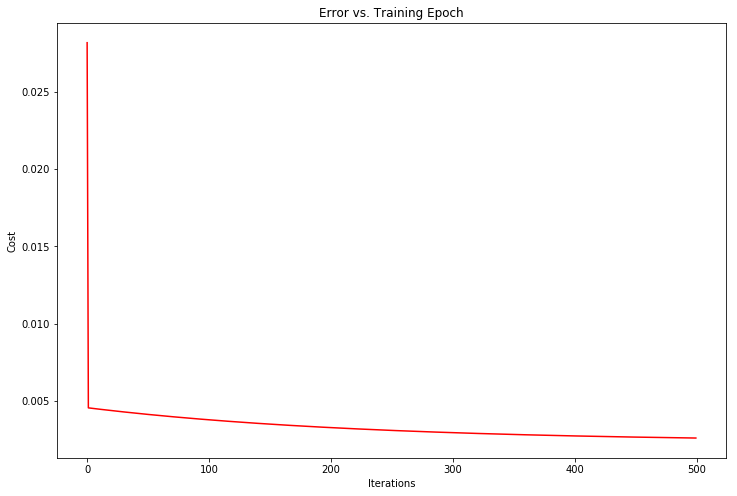

In [23]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(num_iter), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

In [24]:
print ('before training')
print ('weight:{0} , bias:{1}'.format(w_init,b_init))
print ('after training')
print ('weight:{0} , bias:{1}'.format(w_val[-1],b_val[-1]))

before training
weight:0 , bias:0
after training
weight:[0.63964814] , bias:[0.10866109]


In [25]:
x_test[2]*w_val[-1] + b_val[-1]

array([0.1553554])

In [26]:

#test 
#x_test = np.array(data_x[0:5])
#y_test = np.array(data_y[0:5])
y_test_predicted=x_test[0:5]*w_val[-1]+b_val[-1]
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test[0:5])

predicted_value:  [[0.13333323]
 [0.23974742]
 [0.1553554 ]
 [0.16112054]
 [0.17345661]]
true_value:  [[0.105613  ]
 [0.34490399]
 [0.10635155]
 [0.08345643]
 [0.23485968]]


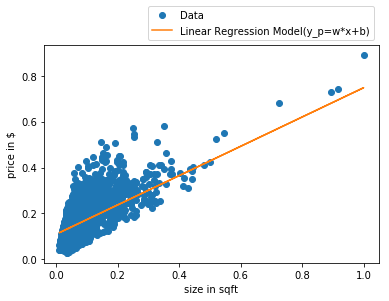

In [27]:
#print ('weight:{0} , bias:{1}'.format(w_val,b_val))
y_test_predicted=x_test*w_val[-1]+b_val[-1]
plt.plot(x_test,y_test,'o', x_test,y_test_predicted,"-")
plt.xlabel("size in sqft")
plt.ylabel("price in $")
plt.legend(['Data', 'Linear Regression Model(y_p=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)
plt.show()

In [28]:
w_val[0][0]

0.01298225992218376

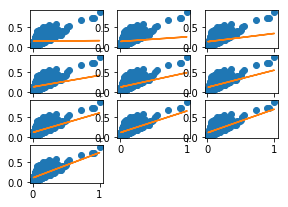

In [31]:
num_cost = int(num_iter/saving_at)
l=5
m=4
l_in=0
m_in=0
for i in range(num_cost):
    y_test_predicted=x_test*w_val[i]+b_val[i]
    #print (l_in,m_in)
    plt.subplot2grid((l,m),(l_in,m_in))
    plt.plot(x_test,y_test,'o', x_test,y_test_predicted,"-")
    #plt.xlabel("size in sqft")
    #plt.ylabel("price in $")
    m_in+=1
    if m_in==m-1:
        l_in+=1
        m_in=0
    #plt.legend(['Data', 'Linear Regression Model(y_p=w*x+b)'],bbox_to_anchor=(1, 1),loc=4)

plt.show()
